### Your name:

<pre> Rishab Kamshetty</pre>

### Collaborators:

<pre>Ashutosh Deowanshi</pre>


In [0]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Classification

**Build a classification model for the default of credit card clients dataset.**

More info here: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

The process and questions you need to think about while coding (you should write your response at the cell in the end part of the notebook)

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one we used in classification notebook.
- Study the ROC Curve, decide threshold
- Use 2 classifiers and cross-validation with 5-folds.
    - Random Forest
        - tune only: n_estimators: {4, 5, 10, 20, 50} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 5, 10, 20} 
    - For other paramenters, use default
- Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [0]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

In [0]:
df = pd.read_excel(url, skiprows= 1, header = 0)

In [34]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [37]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [38]:
df[df.isnull().any(axis=1)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


Looking for categories

In [39]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [40]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [41]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [42]:
# The authors don't indicate what categories 0, 5, and 6 mean. As well, their frequencies are quite low.
# As such, I am collapsing as they suggested in their documentation:
# 1 = graduate school; 2 = university; 3 = high school; 4 = others
df['EDUCATION'].where(df['EDUCATION'] < 4, 4.0, inplace=True)
df['EDUCATION'].where(df['EDUCATION'] > 0, 4.0, inplace=True)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [43]:
# As such, I am collapsing as they suggested in their documentation:
# 11 = married; 2 = single; 3 = others
df['MARRIAGE'].where(df['MARRIAGE'] > 0, 3.0, inplace=True)
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

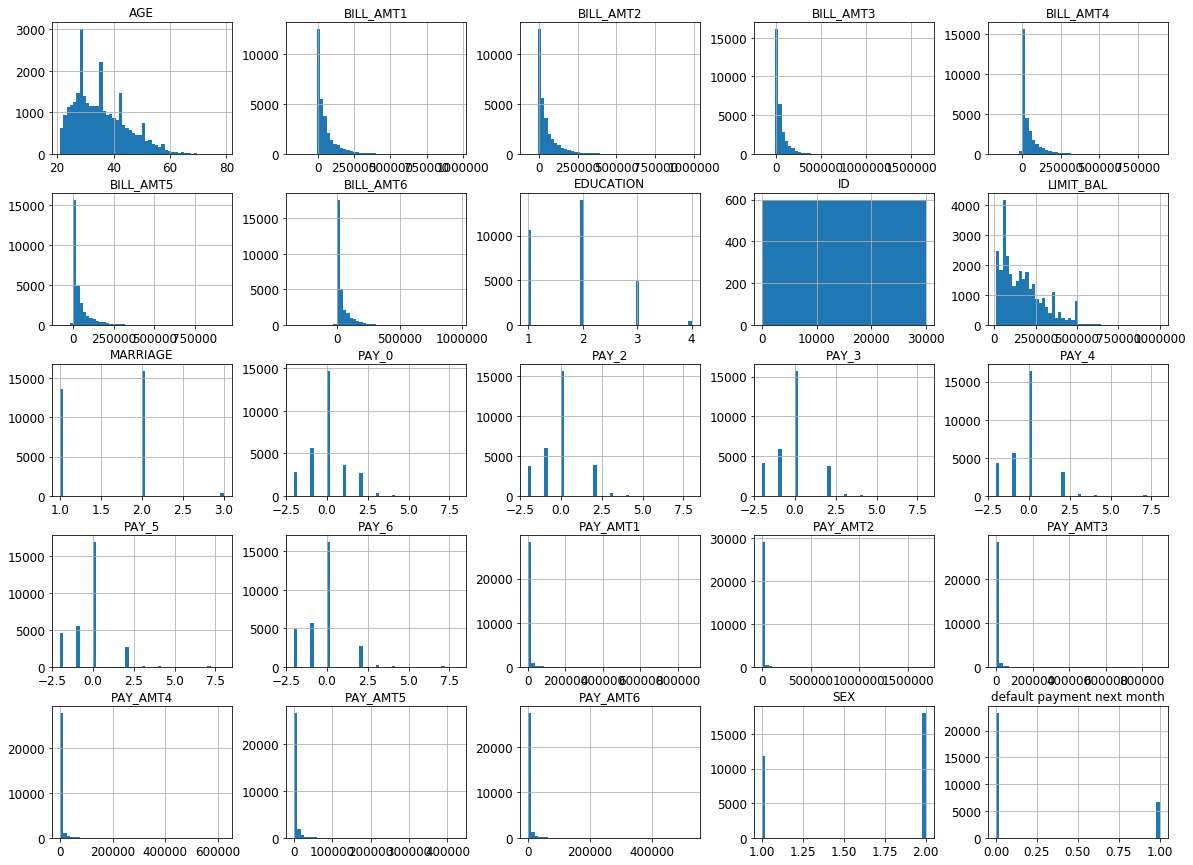

In [44]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Remove ID from data. There is no point to this column.

In [0]:
df_no_id = df.drop("ID", axis=1) 

##Split into Train and Test

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

debug = False

# Split into training and test sets.
data_train, data_test = train_test_split(df_no_id, test_size=0.2, random_state=123)

In [0]:
# Create labels for training set    
df_train = data_train.drop("default payment next month", axis=1) 
df_train_labels = data_train["default payment next month"].copy() 

if (debug):
    print(len(data_train), "train +", len(data_test), "test")
    print (data_train.head())
    print (data_test.head())
    print ("------------------------")
    print (df_train.head())
    print (df_train_labels.head())

##Data Preparation

In [0]:
# Create column selector estimator
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [49]:
# Create pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, OneHotEncoder

df_attribs = list(set(df_train))
num_attribs = [e for e in df_attribs if e not in ('SEX', 'EDUCATION', 'MARRIAGE')]
cat_attribs = "SEX EDUCATION MARRIAGE".split()

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        # Not really needed as no NULLs but left it in anyhow.
        ('imputer', Imputer(strategy="median")),       
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),     
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [50]:
df_prepared = full_pipeline.fit_transform(df_train)
df_prepared[0]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([0.00000e+00, 5.00000e+03, 2.50000e+03, 0.00000e+00, 1.06651e+05,
       2.93000e+03, 1.03422e+05, 3.69200e+03, 1.04137e+05, 0.00000e+00,
       1.03173e+05, 4.60000e+01, 0.00000e+00, 1.50000e+03, 0.00000e+00,
       0.00000e+00, 3.30000e+03, 6.51080e+04, 9.52060e+04, 2.00000e+05,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00])

In [51]:
# Should be have less columns from the one-hots due to decreasing the amount of categories.
df_prepared.shape

(24000, 29)

In [52]:
df_train.shape

(24000, 23)

### Fitting Model

In [0]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [54]:

# Use Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestClassifier(random_state=123)
param_grid = {'n_estimators': [4, 5, 10, 20, 50]}

grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid , cv=5, scoring='roc_auc')

grid_search_rf.fit(df_prepared, df_train_labels)
    
# Results of the grid search for best n_estimator
print(grid_search_rf.best_params_)
print ("------------")

# Results of the grid search in general
cvres = grid_search_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

{'n_estimators': 50}
------------
0.6907932118772075 {'n_estimators': 4}
0.7003962169375375 {'n_estimators': 5}
0.7264181008450505 {'n_estimators': 10}
0.7444192812155643 {'n_estimators': 20}
0.7554050748263023 {'n_estimators': 50}


In [55]:

# Use KNN 
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 10, 20]}

grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid , cv=5, scoring='roc_auc')
grid_search_knn.fit(df_prepared, df_train_labels)
    
# Results of the grid search for best n_estimator
print(grid_search_knn.best_params_)
print ("------------")

# Results of the grid search in general
cvres = grid_search_knn.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

{'n_neighbors': 20}
------------
0.5821771011375204 {'n_neighbors': 3}
0.6006798946294735 {'n_neighbors': 5}
0.62667678062411 {'n_neighbors': 10}
0.6443005125061512 {'n_neighbors': 20}


The best RF estimator (with n_estimators = 50) has an ROC AUC of 0.7554050748263023

Compare this to the best KNN estimator (with n_neighors = 20) which has an ROC AUC of 0.6443005125061512 .

Effectively, the best model out of the models trained is Random Forest with n_estimators = 50. 

Plotting the curves for the best RF and KNN estimators.

In [0]:
from sklearn.model_selection import cross_val_predict

forest_clf = grid_search_rf.best_estimator_
y_probas_forest = cross_val_predict(forest_clf, df_prepared, df_train_labels, cv=5, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(df_train_labels, y_scores_forest)

knn_clf = grid_search_knn.best_estimator_
y_probas_knn = cross_val_predict(knn_clf, df_prepared, df_train_labels, cv=5, method="predict_proba")
y_scores_knn = y_probas_knn[:, 1] 
fpr_knn, tpr_knn, thresholds_knn = roc_curve(df_train_labels, y_scores_knn)

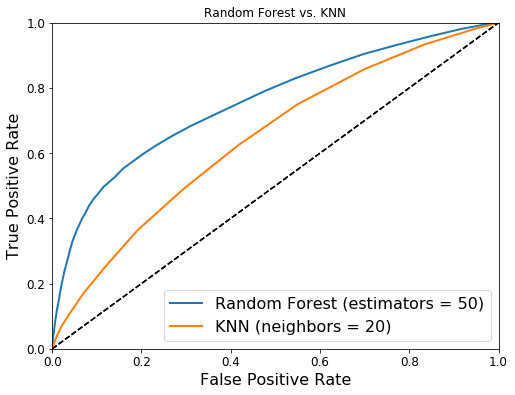

In [62]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest (estimators = 50)")
plot_roc_curve(fpr_knn, tpr_knn, "KNN (neighbors = 20)")
plt.legend(loc="lower right", fontsize=16)
plt.title("Random Forest vs. KNN")
plt.show()

###The best model on test data

In [58]:
# Use 
final_model = forest_clf

X_test = data_test.drop("default payment next month", axis=1)
y_test = data_test["default payment next month"].copy()

X_test_prepared = full_pipeline.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


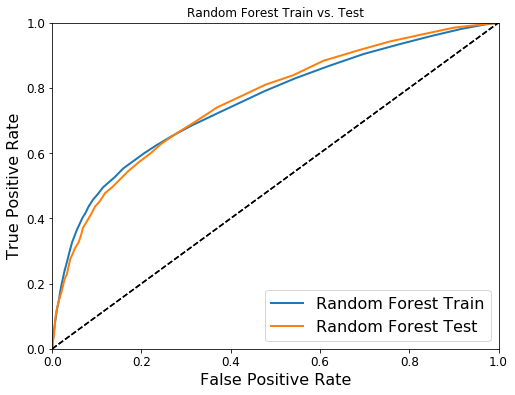

In [59]:
# Plot the test ROC curve. Compare with the train curve.
y_probas_forest_test = cross_val_predict(forest_clf, X_test_prepared, y_test, cv=5, method="predict_proba")
y_scores_forest_test = y_probas_forest_test[:, 1] 
fpr_forest_test, tpr_forest_test, thresholds_forest_test = roc_curve(y_test, y_scores_forest_test)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest Train")
plot_roc_curve(fpr_forest_test, tpr_forest_test, "Random Forest Test")
plt.legend(loc="lower right", fontsize=16)
plt.title("Random Forest Train vs. Test")
plt.show()

In [60]:
# Print ROC AUC score
from sklearn.metrics import roc_auc_score

print("ROC AUC Random Forest on test data: ", roc_auc_score(y_test, y_scores_forest_test))

ROC AUC Random Forest on test data:  0.7591776319227432


### Conclusions

**Q1. Explain your results, choices and responses to all of the questions at the begining of the notebook.**

I noted a few observations on the underlying data in the above section for 'Data Exploration'. I would still argue tweaking the raw features could improve the model.

The best classifier model is Random Forest (RF) with n_estimators = 50. Since it is on the extreme parameter range, we could increase the number of estimators and evaluate performance.

On RF, the training set and test set had an ROC AUC score of slightly above 0.75 with the test set performing slightly better (0.755405074826302 vs. 0.7591776319227432) and can be visualized above in the Train vs. Test curve.

For comparison, on KNN, the training set had an optimal score of 0.6443005125061512  for n_neighbors: 20. However, this is again at an extreme parameter range and increasing the number of neighbors might be a worthwhile endeavor.